<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Первичный-анализ-данных.-План-проекта.-Вопросы." data-toc-modified-id="Первичный-анализ-данных.-План-проекта.-Вопросы.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Первичный анализ данных. План проекта. Вопросы.</a></span><ul class="toc-item"><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Загрузим-и-откроем-файлы-с-данными." data-toc-modified-id="Загрузим-и-откроем-файлы-с-данными.-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Загрузим и откроем файлы с данными.</a></span></li><li><span><a href="#Графический-анализ" data-toc-modified-id="Графический-анализ-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Графический анализ</a></span></li></ul></li><li><span><a href="#План-работы" data-toc-modified-id="План-работы-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>План работы</a></span></li></ul></li><li><span><a href="#Моделирование" data-toc-modified-id="Моделирование-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Моделирование</a></span><ul class="toc-item"><li><span><a href="#Предобработка-данных-и-создание-полного-набора" data-toc-modified-id="Предобработка-данных-и-создание-полного-набора-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Предобработка данных и создание полного набора</a></span></li><li><span><a href="#Подготовка-данных-для-моделей" data-toc-modified-id="Подготовка-данных-для-моделей-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подготовка данных для моделей</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>CatBoost</a></span></li></ul></li><li><span><a href="#Тестирование-лучшей-модели-и-анализ-важности-факторов" data-toc-modified-id="Тестирование-лучшей-модели-и-анализ-важности-факторов-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Тестирование лучшей модели и анализ важности факторов</a></span></li><li><span><a href="#Анализ-важности-факторов" data-toc-modified-id="Анализ-важности-факторов-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Анализ важности факторов</a></span></li></ul></li><li><span><a href="#Отчет" data-toc-modified-id="Отчет-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Отчет</a></span></li></ul></div>

# Оптимизация производственных расходов для металлургического комбината

Чтобы оптимизировать производственные расходы, металлургический комбинат решил уменьшить потребление электроэнергии на этапе обработки стали, с помщью предсказания температуры. 

Задача: построить модель, которая предскажет температуру стали.

**Описание данных**

Данные состоят из файлов, полученных из разных источников:

- `data_arc_new.csv` — данные об электродах;
- `data_bulk_new.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time_new.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas_new.csv` — данные о продувке сплава газом;
- `data_temp_new.csv` — результаты измерения температуры;
- `data_wire_new.csv` — данные о проволочных материалах (объём);
- `data_wire_time_new.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

## Первичный анализ данных. План проекта. Вопросы.

### Анализ данных

#### Загрузим и откроем файлы с данными.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import shap

In [3]:
file = ['/datasets/data_arc_new.csv', '/datasets/data_bulk_new.csv', '/datasets/data_bulk_time_new.csv', '/datasets/data_gas_new.csv',
                          '/datasets/data_temp_new.csv', '/datasets/data_wire_new.csv', '/datasets/data_wire_time_new.csv']

try:
    data_arc = pd.read_csv(file[0]) 
    print('Файл 0 успешно загружен!')
except:
    print('Ошибка загрузки файла 0 ...')
try:
    data_bulk = pd.read_csv(file[1]) 
    print('Файл 1 успешно загружен!')
except:
    print('Ошибка загрузки файла 1 ...')
try:
    data_bulk_time = pd.read_csv(file[2]) 
    print('Файл 2 успешно загружен!')
except:
    print('Ошибка загрузки файла 2 ...')
try:
    data_gas = pd.read_csv(file[3]) 
    print('Файл 3 успешно загружен!')
except:
    print('Ошибка загрузки файла 3 ...')
try:
    data_temp = pd.read_csv(file[4]) 
    print('Файл 4 успешно загружен!')
except:
    print('Ошибка загрузки файла 4 ...')
try:
    data_wire = pd.read_csv(file[5]) 
    print('Файл 5 успешно загружен!')
except:
    print('Ошибка загрузки файла 5 ...')
try:
    data_wire_time = pd.read_csv(file[6]) 
    print('Файл 6 успешно загружен!')
except:
    print('Ошибка загрузки файла 6 ...')
    

Файл 0 успешно загружен!
Файл 1 успешно загружен!
Файл 2 успешно загружен!
Файл 3 успешно загружен!
Файл 4 успешно загружен!
Файл 5 успешно загружен!
Файл 6 успешно загружен!


**Данные об электродах**

Для каждой итерации каждой партии в таблице содержатся время нагрева дугой и мощности.

In [6]:
data_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


Пустых значений нет, даты можно привести позже в тип даты-времени.

In [7]:
print(min(data_arc['Начало нагрева дугой']),'\n', max(data_arc['Конец нагрева дугой']))

2019-05-03 11:02:14 
 2019-09-06 17:26:15


Данные нам предоставлены примерно за 4 месяца.

**Данные о подаче сыпучих материалов (объём)**

In [1]:
data_bulk.head()

In [9]:
data_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


**Данные о подаче сыпучих материалов (время)**

In [2]:
data_bulk_time.head()

Для каждой партии для каждого типа материала в двух таблицах указан объем и время подачи. NaN стоит там, где материлы ни разу не подавали в партию. Каждый материал хотя бы один раз участвовал в процессе.

**Данные о продувке сплава газом**

In [3]:
data_gas.head()

In [12]:
data_gas['key'].value_counts().mean()

1.0

Данные о продувке газом указаны только один раз для партии, пока не ясно, что они показывают.

**Результаты измерения температуры**

In [4]:
data_temp.head()

In [14]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


Указана температура для каждой партии во время всего процесса. Присутствуют пустые значения температуры, их нужно будет обработать. Если для какой-либо партии все итерации окажутся пустыми, нужно будет удалить данных этих партий.

**Данные о проволочных материалах (объём)**

In [5]:
data_wire.head()

**Данные о проволочных материалах (время)**

In [6]:
data_wire_time.head()

Так же, как и в таблицах для сыпучих материалов, в двух таблицах о проволочных материалах в каждой строке написано когда и какой материал добавлялся.

#### Графический анализ

Посмотрим распределение времени нагрева стали. Добавим столбец с минутами.

In [7]:
data_arc['Начало нагрева дугой'] = pd.to_datetime(data_arc['Начало нагрева дугой'],format='%Y-%m-%d %H:%M:%S' )
data_arc['Конец нагрева дугой'] = pd.to_datetime(data_arc['Конец нагрева дугой'],format='%Y-%m-%d %H:%M:%S' )

data_arc['Минуты нагрева'] = (data_arc['Конец нагрева дугой']- data_arc['Начало нагрева дугой']).dt.total_seconds() / 60.0
data_arc.head()

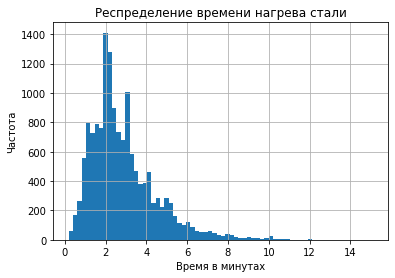

In [18]:
plt.title('Респределение времени нагрева стали')
plt.xlabel('Время в минутах')
plt.ylabel('Частота')
data_arc['Минуты нагрева'].hist(bins = 70);

In [19]:
data_arc['Минуты нагрева'].mean()

2.8611824415165366

В среднем на разных итерациях нагрев происходит за 2.9 минут.

Выведем количество итераций для каждой партии

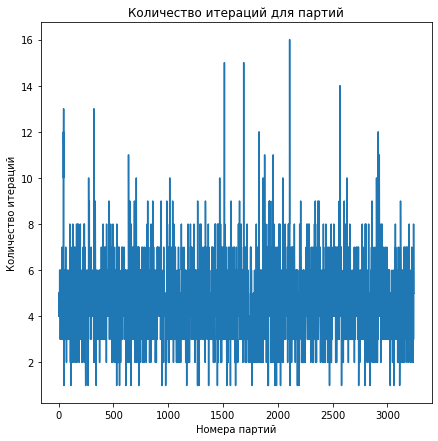

In [20]:
plt.title('Количество итераций для партий')
plt.xlabel('Номера партий')
plt.ylabel('Количество итераций')

data_arc['key'].value_counts().sort_index().plot(figsize = (7,7));

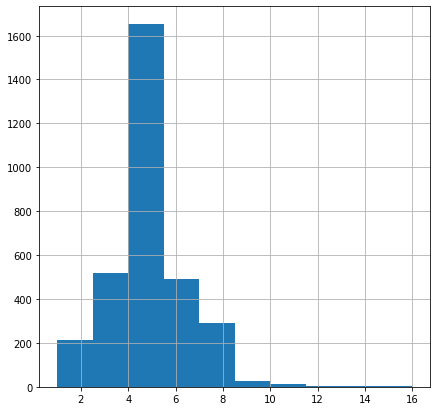

In [21]:
data_arc['key'].value_counts().sort_index().hist(figsize = (7,7));

Для большинства партий характерны значения количества итераций в районе 2 - 8, возможно, больше 10 -  это аномалии.

Далее выведем распределение температур, которые были на разных итерациях.

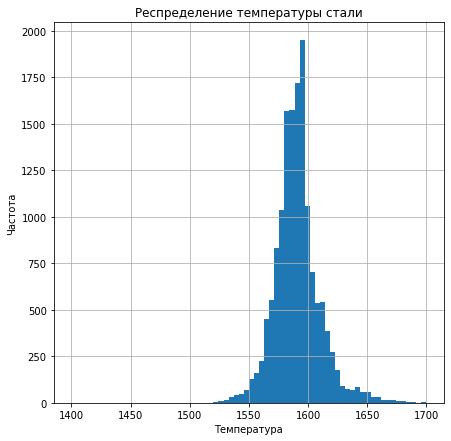

In [22]:
plt.title('Респределение температуры стали')
plt.xlabel('Температура')
plt.ylabel('Частота')
data_temp['Температура'].hist(bins = 70, figsize = (7,7), range = (1400,1700));

А теперь посмотрим температуру только для последнего измерения каждой партии.

In [23]:
d = data_temp.pivot_table(index = 'key', values = ['Время замера'], aggfunc = 'max', fill_value = 0)
d = d.merge(data_temp, on = 'Время замера' )
d.head()

,Время замера,key,Температура
0,2019-05-03 11:30:38,1,1613.0
1,2019-05-03 11:55:09,2,1602.0
2,2019-05-03 12:35:57,3,1599.0
3,2019-05-03 12:59:47,4,1625.0
4,2019-05-03 13:36:39,5,1602.0


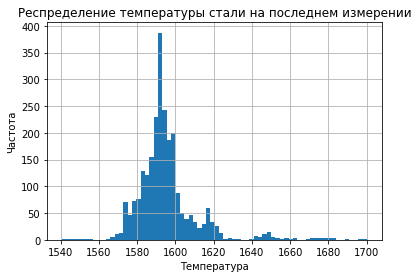

In [24]:
plt.title('Респределение температуры стали на последнем измерении')
plt.xlabel('Температура')
plt.ylabel('Частота')

d['Температура'].hist(bins = 70);

Температуры стали на последнем этапе для разных партий по большей части располагаются между 1580 и 1620 градусов. Возможно, все, что вне - это выбросы.

Посмотрим на рапределение данных для газа для разных партий.

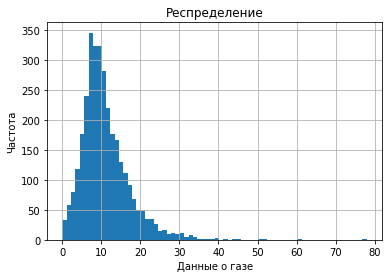

In [25]:
plt.title('Респределение')
plt.xlabel('Данные о газе')
plt.ylabel('Частота')
data_gas['Газ 1'].hist(bins = 70);

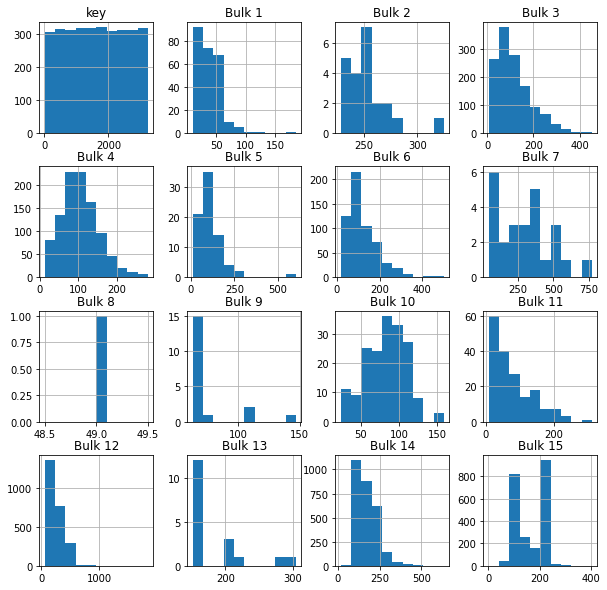

In [26]:
data_bulk.hist(figsize=(10,10));

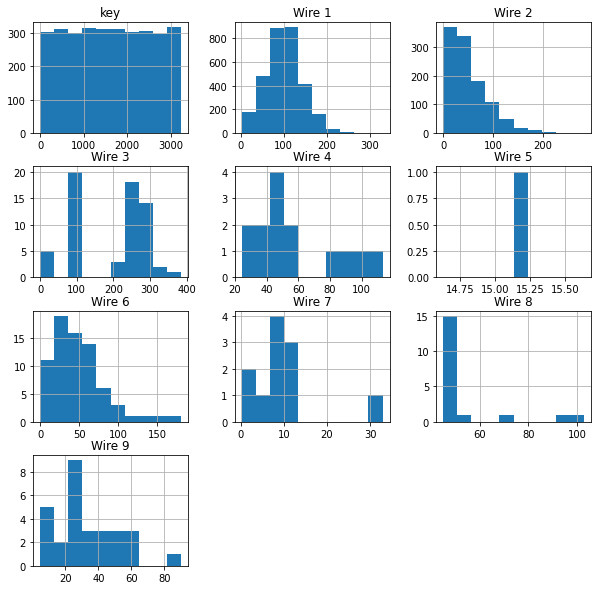

In [27]:
data_wire.hist(figsize=(10,10));

Из графиков видно, что примеси (сыпучие и проволока) добавлялись с различной частой. Зависимость была от начального состава и др факторов.

**Вывод:**

В данных есть пропуски в целевой переменной, эти данные (целиком о партиях) нужно будет убрать. Пропуски в данных о присадках можно будет заменить на нули. Выбросы в данных о мощностях нужно будет убрать, если эти данные пойдут в обучение. Далее следует изучить корреляции и собрать обучающую выборку из всех таблиц.

### План работы

1. Определить какие данные нужны в итоге для обучения модели
2. Предобработка нужных таблиц или собранной таблицы (если вдруг не все нужны будут, чтобы не делать лишнее)
3. Разделение данных на выборки (обучение, валидация, тест) и выделение целевого признака
4. Выбор моделей для решения задачи регрессии (так как мы предсказываем температуру)
5. Выбор метрики для оценки моделей
7. Обучение моделей и проверка итоговой метрики
8. Выбор и проверка лучшей модели на тестовых данных
9. Выводы

## Моделирование

### Предобработка данных и создание полного набора

Мы выяснили, что не для всех партий есть конечный замер температуры. Стоит удалить из таблицы данные о таких партиях.

In [28]:
data_temp['Температура'].isna().sum()

3427

Сделаем две сводные из таблицы температур по первому времени замера для партий и по последнему времени замера, затем объединим их в одну. Выйдет таблица начальных и конечных температур для каждой партии.

In [29]:
first_temp = data_temp.pivot_table(index = 'key', values = ['Время замера'], aggfunc = 'min', fill_value = 0)
first_temp = data_temp.merge(first_temp, on = 'Время замера' )
first_temp.head()

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,2,2019-05-03 11:34:04,1581.0
2,3,2019-05-03 12:06:44,1596.0
3,4,2019-05-03 12:39:27,1601.0
4,5,2019-05-03 13:11:03,1576.0


In [30]:
first_temp['Температура'].isna().sum()

0

In [31]:
last_temp = data_temp.pivot_table(index = 'key', values = ['Время замера'], aggfunc = 'max')
last_temp = data_temp.merge(last_temp, on = 'Время замера' )
last_temp.head()

,key,Время замера,Температура
0,1,2019-05-03 11:30:38,1613.0
1,2,2019-05-03 11:55:09,1602.0
2,3,2019-05-03 12:35:57,1599.0
3,4,2019-05-03 12:59:47,1625.0
4,5,2019-05-03 13:36:39,1602.0


In [32]:
last_temp['Температура'].isna().sum()

739

In [33]:
merge_temp = first_temp.merge(last_temp, on = 'key')
merge_temp.head()

,key,Время замера_x,Температура_x,Время замера_y,Температура_y
0,1,2019-05-03 11:02:04,1571.0,2019-05-03 11:30:38,1613.0
1,2,2019-05-03 11:34:04,1581.0,2019-05-03 11:55:09,1602.0
2,3,2019-05-03 12:06:44,1596.0,2019-05-03 12:35:57,1599.0
3,4,2019-05-03 12:39:27,1601.0,2019-05-03 12:59:47,1625.0
4,5,2019-05-03 13:11:03,1576.0,2019-05-03 13:36:39,1602.0


In [34]:
merge_temp = merge_temp.dropna()

merge_temp.isna().sum()

key               0
Время замера_x    0
Температура_x     0
Время замера_y    0
Температура_y     0
dtype: int64

Проверим даты первой и последней засыпок проволоки и сыпучих материалов. Они не должны быть раньше первого измерения температуры и позже последнего.

**Для сыпучих.**

In [35]:
m = np.array(data_bulk_time.columns)

In [36]:
data_bulk_time.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47


In [37]:
min_data_bulk = []
for i in range(len(data_bulk_time)):
    minn = '2025-01-01 23:59:59'
    for j in range(1, len(m)-1):
        if str(data_bulk_time.loc[i,m[j]])< minn:
            minn = data_bulk_time.loc[i,m[j]]
    min_data_bulk.append(minn)
  

In [38]:
max_data_bulk = []
for i in range(len(data_bulk_time)):
    maxx = '1999-01-01 23:59:59'
    for j in range(1, len(m)-1):
        if maxx<str(data_bulk_time.loc[i,m[j]]) and str(data_bulk_time.loc[i,m[j]]) != 'nan':
            maxx = data_bulk_time.loc[i,m[j]]
    max_data_bulk.append(maxx)

In [39]:
data_bulk_time['min_date'] = min_data_bulk
data_bulk_time['max_date'] = max_data_bulk
data_bulk_time.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,min_date,max_date
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43,2019-05-03 11:14:50,2019-05-03 11:28:48
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39,2019-05-03 11:36:50,2019-05-03 11:53:30
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16,2019-05-03 12:21:01,2019-05-03 12:32:39
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36,2019-05-03 12:43:22,2019-05-03 12:58:00
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47,2019-05-03 13:30:47,2019-05-03 13:34:12


**Для проволоки.**

In [40]:
n = np.array(data_wire_time.columns)

In [41]:
data_wire_time.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
min_data_wire = []
for i in range(len(data_wire_time)):
    minn = '2025-01-01 23:59:59'
    for j in range(1, len(n)-1):
        if str(data_wire_time.loc[i,n[j]])< minn:
            minn = data_wire_time.loc[i,n[j]]
    min_data_wire.append(minn)
  

In [43]:
max_data_wire = []
for i in range(len(data_wire_time)):
    maxx = '1999-01-01 23:59:59'
    for j in range(1, len(n)-1):
        if maxx<str(data_wire_time.loc[i,n[j]]) and str(data_wire_time.loc[i,n[j]]) != 'nan':
            maxx = data_wire_time.loc[i,n[j]]
    max_data_wire.append(maxx)
  

In [44]:
data_wire_time['min_date'] = min_data_wire
data_wire_time['max_date'] = max_data_wire
data_wire_time.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9,min_date,max_date
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:06:19,2019-05-03 11:06:19
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:36:50,2019-05-03 11:36:50
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:11:46,2019-05-03 12:11:46
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:43:22,2019-05-03 12:43:22
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:15:34,2019-05-03 13:20:44


Сравним даты-время первых и последних добавок с первым и последним изменением температуры. 

Первое время замера должно быть меньше, чем обе добавки, то есть того времени, что больше в сумме должно быть ноль.

In [45]:
(merge_temp.merge(data_bulk_time, on = 'key')['Время замера_x']> merge_temp.merge(data_bulk_time, on = 'key')['min_date']).sum()

0

In [46]:
(merge_temp.merge(data_wire_time, on = 'key')['Время замера_x']> merge_temp.merge(data_wire_time, on = 'key')['min_date']).sum()

0

Последнее время замера должно быть больше, чем последнее время добавок. То есть тех, что меньше быть не должно. 

In [47]:
(merge_temp.merge(data_bulk_time, on = 'key')['Время замера_y']< merge_temp.merge(data_bulk_time, on = 'key')['max_date']).sum()

1

In [48]:
(merge_temp.merge(data_wire_time, on = 'key')['Время замера_y']< merge_temp.merge(data_wire_time, on = 'key')['max_date']).sum()

1

Попался один случай в обеих таблицах, когда последнее время замера оказалось не последним. Эту партию нужно удалить.

In [49]:
a = merge_temp.merge(data_bulk_time, on = 'key')
k_todrop = int(a[a['Время замера_y']<a['max_date']]['key'])
a = merge_temp.merge(data_wire_time, on = 'key')
k_todrop1 = int(a[a['Время замера_y']<a['max_date']]['key'])
print(k_todrop, k_todrop1)

279 279


Это одна партия. 

In [50]:
merge_temp = merge_temp[merge_temp['key']!= k_todrop]

Теперь разберемся с таблицей нагрева. Нужно удалить выбросы в мощностях, если они есть. Затем посчитать общую мощность и сделать сводную по партии.

Количество аномалий в активной мощности:  72


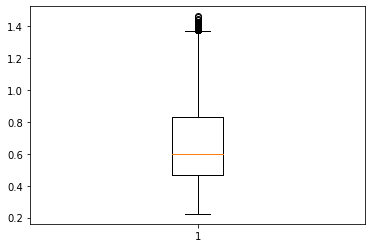

In [52]:
boxplot = plt.boxplot(data_arc['Активная мощность'].values)
outliers = list(boxplot["fliers"][0].get_data()[1])
data_arc1_outliers= data_arc[data_arc['Активная мощность'].isin(outliers)]
print("Количество аномалий в активной мощности: ", len(data_arc1_outliers)) 

Количество аномалий в реактивной мощности:  199


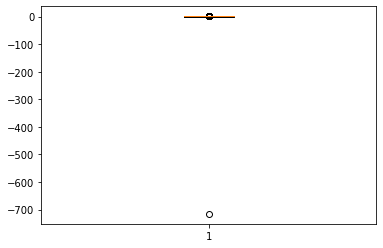

In [53]:
boxplot2 = plt.boxplot(data_arc['Реактивная мощность'].values)
outliers2 = list(boxplot2["fliers"][0].get_data()[1])
data_arc2_outliers= data_arc[data_arc['Реактивная мощность'].isin(outliers2)]
print("Количество аномалий в реактивной мощности: ", len(data_arc2_outliers)) 

Судя по всему в мощностях присутствуют выбросы. Их лучше удалить, возможно это ошибки измерений. Данные в любом случае будут агрегироваться и они могут сильно повлиять на результат.

In [54]:
data_arc1_outliers['key'].values

array([ 118,  147,  154,  165,  204,  228,  237,  296,  304,  317,  319,
        327,  400,  564,  582,  601,  681,  687,  748,  825,  845,  902,
        928,  955,  963,  966,  976, 1025, 1199, 1218, 1227, 1250, 1283,
       1298, 1310, 1316, 1342, 1404, 1407, 1445, 1454, 1470, 1585, 1590,
       1636, 1663, 1680, 1755, 1759, 1823, 1841, 1881, 1944, 2028, 2048,
       2055, 2066, 2109, 2290, 2306, 2427, 2431, 2509, 2563, 2617, 2645,
       2695, 2732, 2766, 2901, 2938, 3017])

In [56]:
data_temp['Температура'] = data_temp['Температура'].fillna(0)
data_temp = data_temp[data_temp['Температура']>=1400]

In [57]:
(data_arc['Реактивная мощность']<=0).sum()


1

In [58]:
(data_arc['Активная мощность']<=0).sum()

0

In [59]:
data_arc = data_arc[data_arc['Реактивная мощность']>0]

Посчитаем общую мощность.

In [60]:
data_arc['Общая мощность'] = (data_arc['Активная мощность']**2+data_arc['Реактивная мощность']**2)**0.5
data_arc.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,Минуты нагрева,Общая мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,3.800000,0.371123
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,3.083333,0.902319
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,2.866667,0.722536
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,6.083333,0.642824
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,2.466667,1.079934


Сагрегируем данные по нагреву. Просуммируем общую мощность и время нагрева.

In [61]:
data_arc_merge = pd.pivot_table(data_arc, index  = 'key', values  = ['Минуты нагрева', 'Общая мощность'], aggfunc = sum)
data_arc_merge.head()

,Минуты нагрева,Общая мощность
key,,
1,18.300000,3.718736
2,13.516667,2.588349
3,10.916667,5.019223
4,12.350000,3.400038
5,14.483333,2.816980


Добавим в таблицы присыпок суммы по каждой партии.И объедними все таблицы внутренним объединением так, чтобы вошли только партии, которые остались во всех таблицах. 

In [62]:
data_wire = data_wire.fillna(0)
data_wire['wire_sum'] = (data_wire['Wire 1']+data_wire['Wire 2']+data_wire['Wire 3']+data_wire['Wire 4']+
                         data_wire['Wire 5']+data_wire['Wire 6']+data_wire['Wire 7']+data_wire['Wire 8']+data_wire['Wire 9'])
data_wire.head()


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9,wire_sum
0,1,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.059998
1,2,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.052315
2,3,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.160157
3,4,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.063515
4,5,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.352796


In [63]:
data_bulk = data_bulk.fillna(0)
data_bulk['bulk_sum'] = (data_bulk['Bulk 1']+data_bulk['Bulk 2']+data_bulk['Bulk 3']+data_bulk['Bulk 4']+data_bulk['Bulk 5']+
                        data_bulk['Bulk 6']+data_bulk['Bulk 7']+data_bulk['Bulk 8']+data_bulk['Bulk 9']+data_bulk['Bulk 10']+
                        data_bulk['Bulk 11']+data_bulk['Bulk 12']+data_bulk['Bulk 13']+data_bulk['Bulk 14']+data_bulk['Bulk 15']
                        )
data_bulk.head()


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,bulk_sum
0,1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0,553.0
1,2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0,582.0
2,3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0,544.0
3,4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0,595.0
4,5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0,584.0


In [66]:
data_arc_merge.reset_index(inplace= True )

data_arc_merge.head()

,key,Минуты нагрева,Общая мощность
0,1,18.300000,3.718736
1,2,13.516667,2.588349
2,3,10.916667,5.019223
3,4,12.350000,3.400038
4,5,14.483333,2.816980


In [67]:
full_merge = merge_temp.loc[:,['key','Температура_x', 'Температура_y']].merge(data_arc_merge, on = 'key')
full_merge = full_merge.merge(data_gas, on  ='key')
full_merge = full_merge.merge(data_bulk.loc[:,['key','bulk_sum']], on = 'key')
full_merge = full_merge.merge(data_wire.loc[:,['key','wire_sum']], on = 'key')

Теперь из набора можно убрать данные о номере партии, он не нужен в обучении.

In [68]:
full_merge = full_merge.drop('key', axis = 1)

In [70]:
full_merge[full_merge['Минуты нагрева']<=1]

,Температура_x,Температура_y,Минуты нагрева,Общая мощность,Газ 1,bulk_sum,wire_sum
898,1604.0,1598.0,0.95,0.623261,3.14311,70.0,155.186722


### Подготовка данных для моделей

Разделим данные на обучающую и тестовые выборки.

In [72]:
features = full_merge.drop(['Температура_y'], axis = 1)
target = full_merge['Температура_y']

Проверим корреляции между признаками с помощью тепловой карты.

                Температура_x  Минуты нагрева  Общая мощность     Газ 1  \
Температура_x        1.000000       -0.304995       -0.120201  0.037341   
Минуты нагрева      -0.304995        1.000000        0.719734  0.396306   
Общая мощность      -0.120201        0.719734        1.000000  0.370555   
Газ 1                0.037341        0.396306        0.370555  1.000000   
bulk_sum            -0.077137        0.551844        0.387519  0.314006   
wire_sum             0.104003        0.091965        0.168215  0.215411   

                bulk_sum  wire_sum  
Температура_x  -0.077137  0.104003  
Минуты нагрева  0.551844  0.091965  
Общая мощность  0.387519  0.168215  
Газ 1           0.314006  0.215411  
bulk_sum        1.000000  0.007119  
wire_sum        0.007119  1.000000  


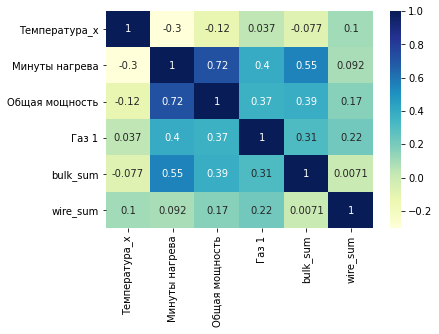

In [73]:
print(features.corr()) 
df_plot = sns.heatmap(features.corr(), cmap="YlGnBu", annot=True)  
plt.show()

Есть небольшая корреляция между общей мощностью и суммой времени нагрева, но ничего более 0.9. Можно ничего не удалять.

In [74]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size = 0.25, random_state=220523) #отделим 25% на тестовую выборку

print('Размеры выборок:')
print('Тренировочная',features_train.shape)
print('Тестовая',features_test.shape)

Размеры выборок:
Тренировочная (1746, 6)
Тестовая (583, 6)


Масштабируем признаки раздельно.

In [75]:
pd.options.mode.chained_assignment = None
scaler = StandardScaler()
scaler.fit(features_train)
features_train = pd.DataFrame(scaler.transform(features_train), columns = features_train.columns)
features_test = pd.DataFrame(scaler.transform(features_test), columns = features_test.columns)

### Обучение моделей

#### Линейная регрессия

Подбор параметров тут бесполезен, их немного, проверим модель как есть на кросс-валидации. 

In [76]:
model_1 = LinearRegression()
score1 = -cross_val_score(model_1, features_train, target_train, scoring='neg_mean_absolute_error').mean()
score1

7.135454146289885

Среднее значение MAE сильно выше, чем нам нужно. Проверим следующую модель.

#### Случайный лес

In [77]:
model_2 = RandomForestRegressor()

Подберем параметры с помощью RandomizedSearchCV.

In [86]:
rs_space={'max_depth':list(np.arange(10, 200, step=10)) + [None],
              'n_estimators':np.arange(10, 600, step=20),
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 20, step=2),
              'max_features':randint(1,7)
         }

In [87]:
m2_random = RandomizedSearchCV(model_2, rs_space, n_iter=600, scoring='neg_mean_absolute_error', n_jobs=-1, cv=3, random_state = 220523)
_random = m2_random.fit(features_train,target_train)

In [88]:
print('Лучшие гиперпараметры: '+str(_random.best_params_))
print('Лучшее MAE: '+str(_random.best_score_))

Лучшие гиперпараметры: {'max_depth': 190, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 170}
Лучшее MAE: -6.718075337851215



- Лучшие гиперпараметры: {'max_depth': 190, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 170}
- Лучшее MAE: -6.718075337851215

Проверим еще раз на кросс-валидации.

In [78]:
model_2 = RandomForestRegressor(max_depth = 190,max_features = 3, min_samples_leaf = 2, min_samples_split = 2, n_estimators =170, random_state = 220523 )

score2 = cross_val_score(model_2, features_train, target_train, scoring='neg_mean_absolute_error').mean()
score2

-6.799192731403662

MAE в пределах того, что нужно.

#### CatBoost

In [79]:
model_3 = CatBoostRegressor()

Подберем параметры с RandomizedSearchCV.

In [126]:
cb_param ={'learning_rate': [0.03, 0.1], 
           'depth': [4, 6, 10], 
           'l2_leaf_reg': [1, 3, 5, 7, 9], 
            'iterations': np.arange(100, 1000, step=20)      
         }

Ячейки закомментированы для быстроты выполнения кода, результат выполнения ниже. 

In [127]:
m3_random = RandomizedSearchCV(model_3, cb_param, n_iter=600, scoring='neg_mean_absolute_error', n_jobs=-1, cv=3, random_state = 220523)
_random3 = m3_random.fit(features_train,target_train)

iteritems is deprecated and will be removed in a future version. Use .items instead.


0:	learn: 10.9571482	total: 1.9ms	remaining: 871ms
1:	learn: 10.8955257	total: 3.58ms	remaining: 820ms
2:	learn: 10.8246988	total: 4.91ms	remaining: 749ms
3:	learn: 10.7583248	total: 6.51ms	remaining: 743ms
4:	learn: 10.6962263	total: 7.8ms	remaining: 710ms
5:	learn: 10.6348798	total: 9.24ms	remaining: 699ms
6:	learn: 10.5808895	total: 10.7ms	remaining: 694ms
7:	learn: 10.5306945	total: 12.2ms	remaining: 690ms
8:	learn: 10.4757330	total: 13.6ms	remaining: 684ms
9:	learn: 10.4252363	total: 15.3ms	remaining: 687ms
10:	learn: 10.3752502	total: 16.6ms	remaining: 679ms
11:	learn: 10.3212297	total: 18.4ms	remaining: 686ms
12:	learn: 10.2764370	total: 19.8ms	remaining: 679ms
13:	learn: 10.2214607	total: 21.1ms	remaining: 672ms
14:	learn: 10.1754567	total: 22.5ms	remaining: 668ms
15:	learn: 10.1283808	total: 23.9ms	remaining: 664ms
16:	learn: 10.0907774	total: 25.3ms	remaining: 659ms
17:	learn: 10.0459395	total: 26.6ms	remaining: 653ms
18:	learn: 10.0003286	total: 28.1ms	remaining: 652ms
19:	l

In [128]:
print('Лучшие гиперпараметры: '+str(_random3.best_params_))
print('Лучшее MAE: '+str(_random3.best_score_))

Лучшие гиперпараметры: {'learning_rate': 0.03, 'l2_leaf_reg': 5, 'iterations': 460, 'depth': 6}
Лучшее MAE: -6.714640462505898


**Новое** step=20
- Лучшие гиперпараметры: {'learning_rate': 0.03, 'l2_leaf_reg': 5, 'iterations': 460, 'depth': 6}
- Лучшее MAE: -6.714640462505898

Проверим полученную модель на кросс-валидации.

In [80]:
model_3 = CatBoostRegressor(learning_rate= 0.03,l2_leaf_reg = 5,iterations = 460,depth = 6, loss_function='MAE' ,random_state = 220523 )
score3 = cross_val_score(model_3, features_train, target_train, scoring='neg_mean_absolute_error').mean()
score3 

0:	learn: 7.8943113	total: 53ms	remaining: 24.3s
1:	learn: 7.8434259	total: 55.9ms	remaining: 12.8s
2:	learn: 7.7967400	total: 58.9ms	remaining: 8.97s
3:	learn: 7.7537498	total: 62.1ms	remaining: 7.08s
4:	learn: 7.7090758	total: 65.4ms	remaining: 5.95s
5:	learn: 7.6759653	total: 67.7ms	remaining: 5.13s
6:	learn: 7.6291655	total: 70ms	remaining: 4.53s
7:	learn: 7.5987161	total: 72.3ms	remaining: 4.08s
8:	learn: 7.5611471	total: 74.1ms	remaining: 3.71s
9:	learn: 7.5151776	total: 75.7ms	remaining: 3.41s
10:	learn: 7.4891486	total: 77.4ms	remaining: 3.16s
11:	learn: 7.4566878	total: 79.2ms	remaining: 2.96s
12:	learn: 7.4207165	total: 80.8ms	remaining: 2.78s
13:	learn: 7.3774869	total: 82.9ms	remaining: 2.64s
14:	learn: 7.3519203	total: 84.8ms	remaining: 2.51s
15:	learn: 7.3123765	total: 86.5ms	remaining: 2.4s
16:	learn: 7.2774922	total: 88.4ms	remaining: 2.3s
17:	learn: 7.2392837	total: 90.1ms	remaining: 2.21s
18:	learn: 7.2183741	total: 91.8ms	remaining: 2.13s
19:	learn: 7.1940059	total: 

-6.6824589549395625

Получили среднее значение меньше минимального. Лучшие результаты вышли у CatBoost

### Тестирование лучшей модели и анализ важности факторов

In [81]:
best_model = CatBoostRegressor(learning_rate= 0.03,l2_leaf_reg = 5,iterations = 460,depth = 6, random_state = 220523, loss_function='MAE' )

best_model.fit(features_train, target_train)

0:	learn: 7.9179028	total: 3.14ms	remaining: 1.44s
1:	learn: 7.8697559	total: 6.14ms	remaining: 1.41s
2:	learn: 7.8245933	total: 9.05ms	remaining: 1.38s
3:	learn: 7.7747057	total: 11.9ms	remaining: 1.36s
4:	learn: 7.7271114	total: 14.7ms	remaining: 1.33s
5:	learn: 7.7043755	total: 17.3ms	remaining: 1.31s
6:	learn: 7.6613302	total: 20ms	remaining: 1.29s
7:	learn: 7.6141113	total: 22.5ms	remaining: 1.27s
8:	learn: 7.5873000	total: 25.1ms	remaining: 1.26s
9:	learn: 7.5498999	total: 27.7ms	remaining: 1.25s
10:	learn: 7.5283483	total: 30.4ms	remaining: 1.24s
11:	learn: 7.4905720	total: 32.7ms	remaining: 1.22s
12:	learn: 7.4634563	total: 34.2ms	remaining: 1.18s
13:	learn: 7.4374391	total: 36.8ms	remaining: 1.17s
14:	learn: 7.4058831	total: 39.5ms	remaining: 1.17s
15:	learn: 7.3660296	total: 42.1ms	remaining: 1.17s
16:	learn: 7.3417191	total: 44.9ms	remaining: 1.17s
17:	learn: 7.3113784	total: 47.1ms	remaining: 1.16s
18:	learn: 7.2796821	total: 48.9ms	remaining: 1.14s
19:	learn: 7.2602831	tot

In [82]:
mean_absolute_error(best_model.predict(features_test), target_test)

6.780262337903328

Итоговое MAE на тестовой выборке равно 6.78. Нам нужно было достигнуть точности не больше 6.8, что мы и сделали.

### Анализ важности факторов

Посмотрим, какие признаки больше всего влияют на итоговую температуру.

In [174]:
shap.initjs()
explainer = shap.Explainer(best_model)
shap_values = explainer(features_train)

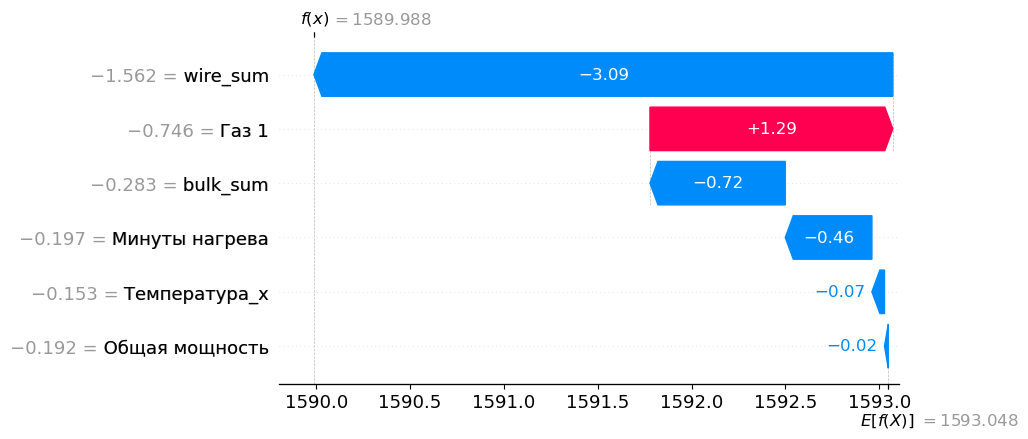

In [175]:
shap.plots.waterfall(shap_values[0])

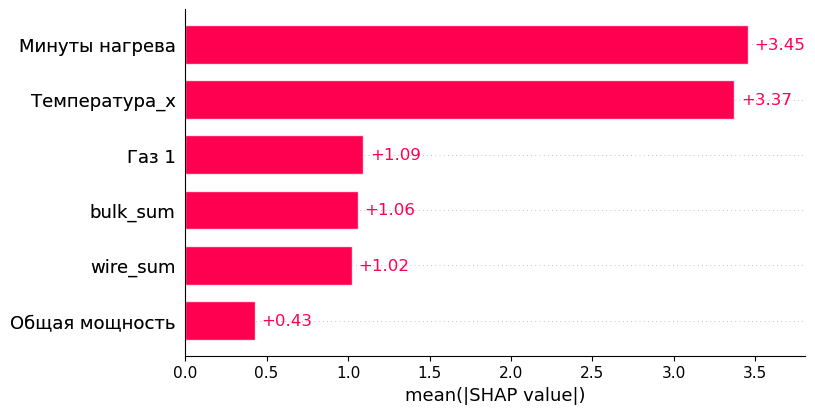

In [178]:
shap.plots.bar(shap_values)

iteritems is deprecated and will be removed in a future version. Use .items instead.
auto_size_plot=False is deprecated and is now ignored! Use plot_size=None instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


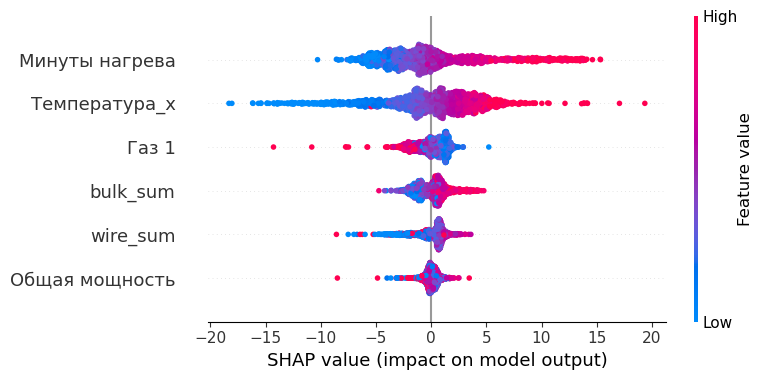

In [177]:
shap_test = shap.TreeExplainer(best_model).shap_values(features_train)

shap.summary_plot(shap_test, features_train, max_display=25, auto_size_plot=True)

**Выводы**

Из графиков можно увидеть следующее:
- Чем меньше суммарно минут нагревали ковш,тем меньше температура в конце обработки
- Точно также с начально температурой, чем она выше изначально, тем выше она и в конце
- С газом обратная ситуация: чем меньше его было суммарно, тем выше конечная температура и наоборот. Видимо при перемешивании газом температура сильно падает.
- При суммарно большом объеме супучих материалов температура может увеличиться к концу, а с проволокой немного сложнее, если ее мало, то температура также увеличивается, а если больше, то это не так сильно влияет на конечную температуру.
- Чем ниже суммарная общая мощность, затраченная на ковш, тем выше температура в конце обработки. 

## Отчет

**Выполнение плана:**
   1) Все пункты плана были выполнены 
   2) При предобработке данных возникли трудности с пониманием, что можно считать выбросами, а что верно отражает работу предприятия. После уточнения этих моментов, предобработку удалось провести верно.
   3) Мы определили какие данные нужны были для отчета; провели предобработку таблиц; собрали полноценную таблицу признаков; разделили данные на обучающую и тестовую выборки; выбрали три модели для решения задачи регрессии, подобрали их гиперпараметры с помощью автоматического подбора RandomizedSearchCV и обучили эти модели; выбрали из них ту, что показала лучшие результаты на кросс-валидации.
   4) Итоговой моделью была выбрана **CatBoostRegressor**, на тестовой выборке она показала MAE = 6.78, т.е. в среднем модель ошибается на 6,78 градусов. 
 
**Из семи таблиц было решено собрать агрегированные признаки в одну таблицу по каждой партии:**

   - Температура_x - начальная температура, измеренная перед обработкой партии. Для корректности следовало проверить, чтобы эта температура была измерена до начала всех добавок и обработок металла, некорректные измерения нужно было удалить вместе со всей информацией по партии, также нужно было проверить, чтобы она была в пределах справочной температуры плавления, а не ниже
   - Минуты нагрева - сумма минут нагрева по каждой партии за все циклы обработки	
   - Общая мощность	- сначала была посчитана общая мощность по формуле для активной и реактивной мощностей, далее была посчитана сумма этих значений по каждой партии. Следовало обработать выбросы по мощностям, но не удалять то, что верно отражало процесс.
   - Газ 1 - даны были данные в сумме по каждой партии, их взяли в конечную таблицу как есть.
   - bulk_sum - по примеру газа - был посчитан суммарный объем добавок сыпучих материалов по каждой партии, следовало проверить даты-время добавок, чтобы первая была после первого измерения температуры, а последняя до последнего измерения 	
   - wire_sum - суммарный объем добавок проволочных материалов по каждой партии, была точно такая же обработка по датам, как и с сыпучими материалами
   - Температура_y - целевая переменная, это конечная температура по каждой партии, её также следовало проверить на соответствие справочной температуре плавления
   
   
**Гиперпараметры лучшей модели:** 

   - Скорость обучения: learning_rate= 0.03
   - Коэффициент при члене регуляризации L2 функции потерь: l2_leaf_reg = 5
   - Максимальное количество построенных деревьев: iterations = 460
   - Глубина дерева: depth = 6
   - Функция потерь: loss_function='MAE' 
   - Случайное зерно: random_state = 220523
   
**Для улучшения модели можно проделать следующее:**
   - Увеличить число гиперпараметров, которые мы подбираем
   - Увеличить количество вариантов для имеющихся гиперпараметров
   - Уменьшить шаг подбора количества деревьев 
   - Увеличить итерации в алгоритме подбора
   - Добавить новые признаки, узнав у заказчика, есть ли еще какие-то данные